In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes, mark_inset
import pickle
import numpy as np
from matplotlib.patches import Circle
import h5py
import json

# Results for nontrivial energy landscape

In [2]:
CASE_LIST = ['small', 'med', 'large']
simulation_results = {}
simulation_results_multiple_starts = {}
capacity_results = {}
model_params = {}
for case in CASE_LIST:
    with open('capacity_based_hitprob/{}_target/simulation_results.pkl'.format(case), 'rb') as f:
        simulation_results[case] = pickle.load(f)
    
    with open('simulation_based_hitprob_multiple_starts/{}_target/results.pkl'.format(case), 'rb') as f:
        simulation_results_multiple_starts[case] = pickle.load(f)
    
    with open('capacity_based_hitprob/{}_target/capacity_results.pkl'.format(case), 'rb') as f:
        capacity_results[case] = pickle.load(f)
    
    with open('capacity_based_hitprob/{}_target/model_params.pkl'.format(case), 'rb') as f:
        model_params[case] = pickle.load(f)

/Users/zhouguangyao/anaconda3/envs/entropic_barrier/lib/python3.6/site-packages/ipykernel_launcher.py:97: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


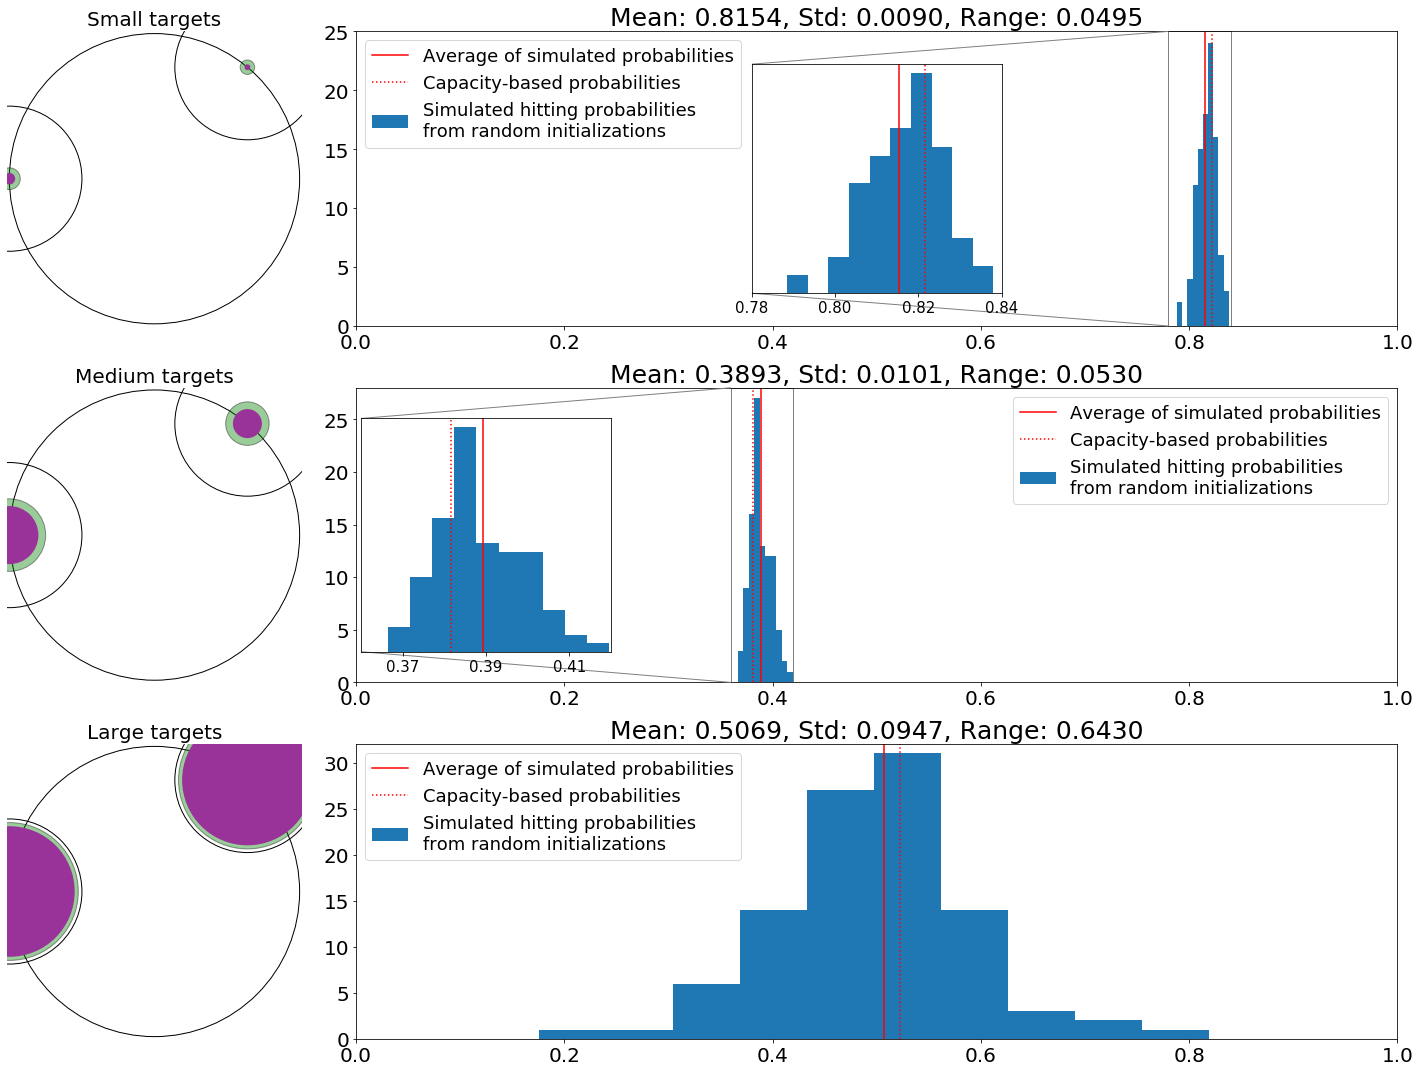

In [3]:
loc_dict = {
    'small': 'center',
    'med': 'center left',
}
legend_loc_dict = {
    'small': 'upper left',
    'med': 'upper right',
    'large': 'upper left'
}
xlim_dict = {
    'small': (0.78, 0.84),
    'med': (0.36, 0.42),
}
ylim_dict = {
    'small': (0, 25),
    'med': (0, 28),
    'large': (0, 32)
}
loc12_dict = {
    'small': (2, 3),
    'med': (2, 3)
}
aspect_dict = {
    'small': 0.0022,
    'med': 0.002
}
tick_dict = {
    'small': np.arange(0.78, 0.85, 0.02),
    'med': np.arange(0.37, 0.42, 0.02)
}
fig = plt.figure(figsize=(20, 15))
for cc, case in enumerate(CASE_LIST):
    # Plot targets
    ax = fig.add_subplot(3, 4, cc * 4 + 1)
    ax.add_patch(Circle((0, 0), 1, fill=False, linewidth=1))
    for ii in range(2):
        center = model_params[case]['target_param_list'][ii]['center'][:2]
        circle_patches = []
        for rr in model_params[case]['target_param_list'][ii]['radiuses']:
            circle_patches.append(Circle(center, rr, fill=False, linewidth=1))
        
        circle_patches[1].set_fill(True)
        circle_patches[1].set_fc('green')
        circle_patches[1].set_ec('black')
        circle_patches[1].set_alpha(0.4)
        circle_patches[0].set_fill(True)
        circle_patches[0].set_fc('magenta')
        for patch in circle_patches:
            ax.add_patch(patch)
            
    ax.axis('off')
    ax.set_aspect(1)
    ax.set_xlim(-1.015, 1.015)
    ax.set_ylim(-1.015, 1.015)
    name = case.capitalize() if case != 'med' else 'Medium'
    ax.set_title('{} targets'.format(name), fontsize=20)
    # Plot histogram
    ax = plt.subplot2grid((3, 4), (cc, 1), 1, 3, fig=fig)
    hitting_prob_list = simulation_results[case]['hitting_prob_list'][:, 0]
    mean_hitprob = np.mean(simulation_results_multiple_starts[case]['hitting_prob_list'][:, 0])
    capacity_based_hitprob = capacity_results[case]['hitting_prob'][0]
    # Zoomed out histogram
    ax.hist(hitting_prob_list, label='Simulated hitting probabilities\nfrom random initializations')
    ax.set_xlim(0, 1)
    ax.set_ylim(*ylim_dict[case])
    ax.xaxis.set_tick_params(labelsize=20)
    ax.yaxis.set_tick_params(labelsize=20)
    ax.set_title('Mean: {:.4f}, Std: {:.4f}, Range: {:.4f}'.format(
        mean_hitprob, np.std(hitting_prob_list), np.ptp(hitting_prob_list)
    ), fontsize=25)
    ax.axvline(x=mean_hitprob, label='Average of simulated probabilities', color='r')
    ax.axvline(
        x=capacity_based_hitprob, label='Capacity-based probabilities',
        color='r', linestyle=':'
    )
    ax.legend(fontsize=18, loc=legend_loc_dict[case])
    # Zoomed in histogram
    if case == 'large':
        continue
        
    axins = zoomed_inset_axes(
        ax, 4, loc=loc_dict[case], axes_kwargs={'aspect': aspect_dict[case]}
    )
    axins.hist(hitting_prob_list)
    axins.axvline(x=mean_hitprob, color='r')
    axins.axvline(
        x=capacity_based_hitprob, color='r', linestyle=':'
    )
    axins.xaxis.set_tick_params(labelsize=15)
    axins.yaxis.set_visible(False)
    axins.set_xlim(*xlim_dict[case])
    axins.set_ylim(*ylim_dict[case])
    axins.set_xticks(tick_dict[case])
    # axins.set_title('Zoomed in histogram')
    mark_inset(ax, axins, loc1=loc12_dict[case][0], loc2=loc12_dict[case][1], fc='none', ec='0.5')

fig.tight_layout()
fig.savefig('results_nontrivial.png', dpi=400)

# Results for flat energy landscape

In [4]:
CASE_LIST = ['small', 'med', 'large']
results = {}
results_multiple_starts = {}
configs = {}
for case in CASE_LIST:
    with open('sanity_checks/{}_target/results.pkl'.format(case), 'rb') as f:
        results[case] = pickle.load(f)
    
    with open('sanity_checks_multiple_starts/{}_target/results.pkl'.format(case), 'rb') as f:
        results_multiple_starts[case] = pickle.load(f)
    
    with open('sanity_checks/{}_target/config.json'.format(case), 'r') as f:
        configs[case] = json.load(f)

/Users/zhouguangyao/anaconda3/envs/entropic_barrier/lib/python3.6/site-packages/ipykernel_launcher.py:97: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


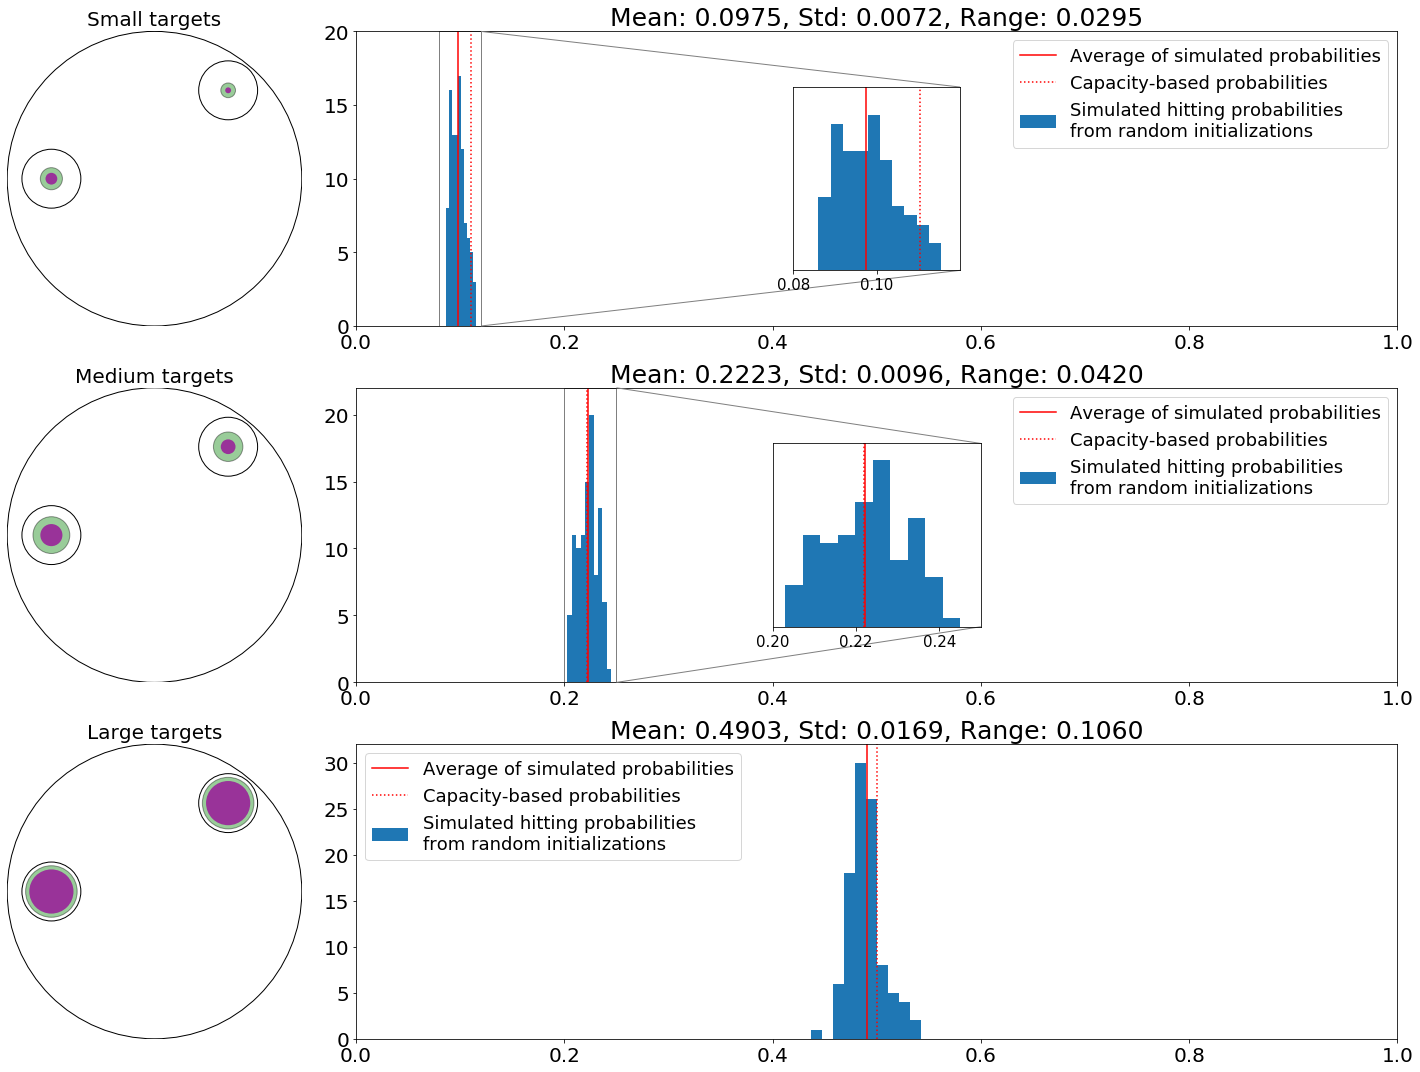

In [5]:
loc_dict = {
    'small': 'center',
    'med': 'center',
}
legend_loc_dict = {
    'small': 'upper right',
    'med': 'upper right',
    'large': 'upper left'
}
xlim_dict = {
    'small': (0.085, 0.12),
    'med': (0.2, 0.25),
}
ylim_dict = {
    'small': (0, 20),
    'med': (0, 22),
    'large': (0, 32)
}
loc12_dict = {
    'small': (1, 4),
    'med': (1, 4)
}
aspect_dict = {
    'small': 0.0022,
    'med': 0.002
}
tick_dict = {
    'small': np.arange(0.08, 0.12, 0.02),
    'med': np.arange(0.2, 0.25, 0.02)
}
fig = plt.figure(figsize=(20, 15))
for cc, case in enumerate(CASE_LIST):
    # Plot targets
    ax = fig.add_subplot(3, 4, cc * 4 + 1)
    ax.add_patch(Circle((0, 0), 1, fill=False, linewidth=1))
    for ii in range(2):
        center = configs[case]['centers'][ii][:2]
        circle_patches = []
        for rr in configs[case]['radiuses'][ii]:
            circle_patches.append(Circle(center, rr, fill=False, linewidth=1))
        
        circle_patches[1].set_fill(True)
        circle_patches[1].set_fc('green')
        circle_patches[1].set_ec('black')
        circle_patches[1].set_alpha(0.4)
        circle_patches[0].set_fill(True)
        circle_patches[0].set_fc('magenta')
        for patch in circle_patches:
            ax.add_patch(patch)
            
    ax.axis('off')
    ax.set_aspect(1)
    ax.set_xlim(-1, 1)
    ax.set_ylim(-1, 1)
    name = case.capitalize() if case != 'med' else 'Medium'
    ax.set_title('{} targets'.format(name), fontsize=20)
    # Plot histogram
    ax = plt.subplot2grid((3, 4), (cc, 1), 1, 3, fig=fig)
    hitting_prob_list = results[case]['hitting_prob_list'][:, 0]
    mean_hitprob = np.mean(results_multiple_starts[case]['hitting_prob_list'][:, 0])
    expected_hitprob = results[case]['expected_hitting_prob'][0]
    # Zoomed out histogram
    ax.hist(hitting_prob_list, label='Simulated hitting probabilities\nfrom random initializations')
    ax.set_xlim(0, 1)
    ax.set_ylim(*ylim_dict[case])
    ax.xaxis.set_tick_params(labelsize=20)
    ax.yaxis.set_tick_params(labelsize=20)
    ax.set_title('Mean: {:.4f}, Std: {:.4f}, Range: {:.4f}'.format(
        mean_hitprob, np.std(hitting_prob_list), np.ptp(hitting_prob_list)
    ), fontsize=25)
    ax.axvline(x=mean_hitprob, label='Average of simulated probabilities', color='r')
    ax.axvline(
        x=expected_hitprob, label='Capacity-based probabilities',
        color='r', linestyle=':'
    )
    ax.legend(fontsize=18, loc=legend_loc_dict[case])
    # Zoomed in histogram
    if case == 'large':
        continue
        
    axins = zoomed_inset_axes(
        ax, 4, loc=loc_dict[case], axes_kwargs={'aspect': aspect_dict[case]}
    )
    axins.hist(hitting_prob_list)
    axins.axvline(x=mean_hitprob, color='r')
    axins.axvline(
        x=expected_hitprob, color='r', linestyle=':'
    )
    axins.xaxis.set_tick_params(labelsize=15)
    axins.yaxis.set_visible(False)
    axins.set_xlim(*xlim_dict[case])
    axins.set_ylim(*ylim_dict[case])
    axins.set_xticks(tick_dict[case])
    # axins.set_title('Zoomed in histogram')
    mark_inset(ax, axins, loc1=loc12_dict[case][0], loc2=loc12_dict[case][1], fc='none', ec='0.5')

fig.tight_layout()
fig.savefig('results_brownian_motion.png', dpi=400)